In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Convolucion

In [ ]:
from google.colab import files

from google.colab import files
import cv2
import numpy as np

Saving image2.jpg to image2 (3).jpg


We load the "normal" images

In [15]:
uploaded = files.upload()

# Guarda las imágenes normales cargadas en una lista de imágenes (formato compatible con OpenCV)
image_list = []
for filename, data in uploaded.items():
    nparr = np.frombuffer(data, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    image_list.append(img)

Saving img0.jpg to img0.jpg
Saving img1.jpg to img1.jpg
Saving img2.jpg to img2.jpg
Saving img3.jpg to img3.jpg
Saving img4.jpg to img4.jpg
Saving img5.jpg to img5.jpg
Saving img6.jpg to img6.jpg
Saving img7.jpg to img7.jpg
Saving img8.jpg to img8.jpg
Saving img9.jpg to img9.jpg
Saving img10.jpg to img10.jpg
Saving img11.jpg to img11.jpg
Saving img12.jpg to img12.jpg


Now we load the annotation images

In [17]:
# Guarda las imágenes normales cargadas en una lista de imágenes (formato compatible con OpenCV)

uploaded = files.upload()

annotation_list = []
for filename, data in uploaded.items():
    nparr = np.frombuffer(data, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    annotation_list.append(img)

Saving imgx0.jpg to imgx0.jpg
Saving imgx1.jpg to imgx1.jpg
Saving imgx2.jpg to imgx2.jpg
Saving imgx3.jpg to imgx3.jpg
Saving imgx4.jpg to imgx4.jpg
Saving imgx5.jpg to imgx5.jpg
Saving imgx6.jpg to imgx6.jpg
Saving imgx7.jpg to imgx7.jpg
Saving imgx8.jpg to imgx8.jpg
Saving imgx9.jpg to imgx9.jpg
Saving imgx10.jpg to imgx10.jpg
Saving imgx11.jpg to imgx11.jpg
Saving imgx12.jpg to imgx12.jpg


Now, for each pair we create a data augmentation for the segmentation dataset. The following function does a convolution in each segmentation image so that we get the border.

In [ ]:
def conv_1(img):

  kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
  convolved_img = cv2.filter2D(img, -1, kernel)

  return convolved_img

The following function "puts" the border image into the original image.

In [23]:
def apply_border(normal_img, border_img, border_value):

  for i in range(512):

    for j in range(512):

      if(border_img[i][j].all() > border_value):

        normal_img[i][j][0] = border_value
        normal_img[i][j][1] = border_value
        normal_img[i][j][2] = border_value

      return normal_img

We apply the previous functions to all the pairs in the dataset

In [19]:
border_images = []

for i in range(len(image_list)):

  border_image = apply_border(image_list[0], annotation_list[0], 0)
  border_images.append(border_image)


The next function outputs the segmented image from the normal image with the border*

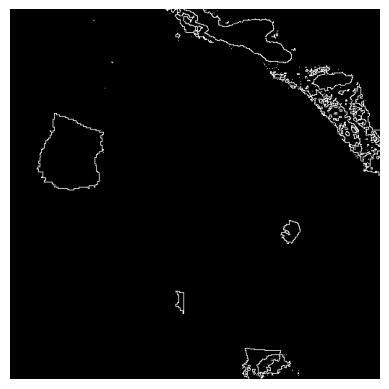

In [ ]:
def get_border_from_trace(img, border_value):

  border_img = np.zeros((512, 512, 3))

  for i in range(512):

    for j in range(512):

      if(img[i][j][0] <= border_value and img[i][j][1] <= border_value and img[i][j][2] <= border_value):

        border_img[i][j][0] = 250
        border_img[i][j][1] = 250
        border_img[i][j][2] = 250

  return border_img

Now from the normal image with the border, we extract the border again. This is really the first data-augmentation step

In [27]:
segmented_images = []

for i in range(len(image_list)):

  segmented_image = get_border_from_trace(border_images[0], 2)
  segmented_images.append(segmented_image)

Finally, we search for the closed shapes in the image and fill with white color. This is the final step in the data-augmentation step, and is the data that we are going to feed the model, alongside the other segmentation images

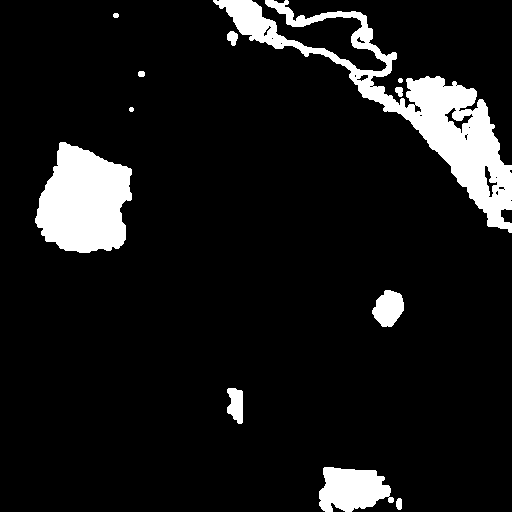

In [ ]:
import cv2
import numpy as np
for img in segmented_images:
  img = (img * 255).astype(np.uint8)

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply thresholding to create a binary image
  _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

  # Find contours in the binary image
  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a copy of the original image to draw filled contours
  filled_image = img.copy()

  # Iterate through the detected contours
  for contour in contours:
      # Draw the contour (optional)
      cv2.drawContours(filled_image, [contour], -1, (255, 255, 255), 2)  # Green outline

      # Fill the contour with a color (blue in this example)
      cv2.fillPoly(filled_image, [contour], (255, 255, 255))  # Blue color fill

  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Display the result

